In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# PREDICTING REDDIT UPVOTES - Data exploration

## Data dictionary:
- **Title:** title of the reddit post
- **Upvote_ratio:** the percentage of upvotes from all votes on thread comment is on
- **Score:** number of upvotes on the comment
- **Gilded:** the number of gilded tags (premium likes) on the comment
- **Over_18:** Whether or not the thread has been marked as NSFW
- **Number_of_comments:** Number of comments

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
%matplotlib inline


## Reading the data

In [6]:
reddit = pd.read_csv('/content/drive/MyDrive/Data science/reddit_submissions_2017.csv')
reddit.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (44) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,link_flair_css_class,thumbnail,created_utc,spoiler,locked,distinguished,hidden,stickied,quarantine,retrieved_on,domain,secure_media,secure_media_embed,title,author,id.1,num_comments,permalink,selftext,archived,url,subreddit,contest_mode,subreddit_id,media,score,suggested_sort,author_flair_css_class,hide_score,preview,edited,author_flair_text,link_flair_text,is_self,media_embed,brand_safe,over_18,post_hint,gilded,author_cakeday,adserver_imp_pixel,third_party_tracking_2,disable_comments,mobile_ad_url,promoted_url,imp_pixel,href_url,adserver_click_url,original_link,third_party_tracking,promoted,promoted_by,promoted_display_name
0,0,NaN,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,1483228800,False,False,NaN,False,False,False,1489388027,smoothcomp.com,NaN,{},South Dakota event next weekend come compete!,sonicbh,5lcgj8,0,/r/bjj/comments/5lcgj8/south_dakota_event_next...,NaN,False,https://smoothcomp.com/event/128,bjj,False,t5_2qn02,NaN,3,NaN,black-belt-confirmed,False,"{'enabled': False, 'images': [{'source': {'hei...",False,Bruce Hoyer - Next Edge Academy,NaN,False,{},True,False,link,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,default,1483228800,False,False,NaN,False,False,False,1489388027,self.AskReddit,NaN,{},What did you think of the ending of Rogue One?,[deleted],5lcgj9,7,/r/AskReddit/comments/5lcgj9/what_did_you_thin...,[deleted],False,https://www.reddit.com/r/AskReddit/comments/5l...,AskReddit,False,t5_2qh1i,NaN,1,NaN,NaN,False,NaN,False,NaN,NaN,True,{},True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,question,self,1483228800,False,False,NaN,False,False,False,1489388027,self.ffxiv,NaN,{},Noob question about free month.,Troyboy321,5lcgja,4,/r/ffxiv/comments/5lcgja/noob_question_about_f...,Hello I'm on mobile and won't be on my PC unti...,False,https://www.reddit.com/r/ffxiv/comments/5lcgja...,ffxiv,False,t5_2rgs7,NaN,5,NaN,NaN,False,NaN,False,NaN,[Question],True,{},True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,self,1483228800,False,False,NaN,False,False,False,1489388027,self.cigars,NaN,{},"It's all about good friends, and Year of the R...",UnjustCustos,5lcgjb,15,/r/cigars/comments/5lcgjb/its_all_about_good_f...,Had a buddy of mine go down to Florida to visi...,False,https://www.reddit.com/r/cigars/comments/5lcgj...,cigars,False,t5_2r090,NaN,4,NaN,NaN,False,NaN,False,NaN,NaN,True,{},False,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,solvedcase,self,1483228801,False,False,NaN,False,False,False,1489388027,self.tipofmytongue,NaN,{},[TOMT][song][musician] Children's cassette tap...,strawberriesncream11,5lcgjc,4,/r/tipofmytongue/comments/5lcgjc/tomtsongmusic...,"When I was younger (born in 1993), I had a cas...",False,https://www.reddit.com/r/tipofmytongue/comment...,tipofmytongue,False,t5_2r4oc,NaN,1,NaN,NaN,False,NaN,False,NaN,Solved,True,{},True,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
reddit.shape

(250000, 54)

In [8]:
#Dropping the unnamed column
reddit.drop('id', axis = 1, inplace = True)

In [9]:
#Checking the duplicated rows

reddit[reddit.duplicated()]

,link_flair_css_class,thumbnail,created_utc,spoiler,locked,distinguished,hidden,stickied,quarantine,retrieved_on,domain,secure_media,secure_media_embed,title,author,id.1,num_comments,permalink,selftext,archived,url,subreddit,contest_mode,subreddit_id,media,score,suggested_sort,author_flair_css_class,hide_score,preview,edited,author_flair_text,link_flair_text,is_self,media_embed,brand_safe,over_18,post_hint,gilded,author_cakeday,adserver_imp_pixel,third_party_tracking_2,disable_comments,mobile_ad_url,promoted_url,imp_pixel,href_url,adserver_click_url,original_link,third_party_tracking,promoted,promoted_by,promoted_display_name


There are no duplicates row

In [10]:
#Columns in the dataset

columns = reddit.columns
print('The columns in the dataset are:', columns)

The columns in the dataset are: Index(['link_flair_css_class', 'thumbnail', 'created_utc', 'spoiler', 'locked',
       'distinguished', 'hidden', 'stickied', 'quarantine', 'retrieved_on',
       'domain', 'secure_media', 'secure_media_embed', 'title', 'author',
       'id.1', 'num_comments', 'permalink', 'selftext', 'archived', 'url',
       'subreddit', 'contest_mode', 'subreddit_id', 'media', 'score',
       'suggested_sort', 'author_flair_css_class', 'hide_score', 'preview',
       'edited', 'author_flair_text', 'link_flair_text', 'is_self',
       'media_embed', 'brand_safe', 'over_18', 'post_hint', 'gilded',
       'author_cakeday', 'adserver_imp_pixel', 'third_party_tracking_2',
       'disable_comments', 'mobile_ad_url', 'promoted_url', 'imp_pixel',
       'href_url', 'adserver_click_url', 'original_link',
       'third_party_tracking', 'promoted', 'promoted_by',
       'promoted_display_name'],
      dtype='object')


## Basic data study

In [11]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   link_flair_css_class    58867 non-null   object 
 1   thumbnail               250000 non-null  object 
 2   created_utc             250000 non-null  int64  
 3   spoiler                 250000 non-null  bool   
 4   locked                  250000 non-null  bool   
 5   distinguished           1720 non-null    object 
 6   hidden                  250000 non-null  bool   
 7   stickied                250000 non-null  bool   
 8   quarantine              250000 non-null  bool   
 9   retrieved_on            250000 non-null  int64  
 10  domain                  250000 non-null  object 
 11  secure_media            28386 non-null   object 
 12  secure_media_embed      250000 non-null  object 
 13  title                   250000 non-null  object 
 14  author              

In [12]:
reddit.dropna(axis=1, thresh = int(0.8*reddit.shape[0]), inplace=True)

In [13]:
reddit.shape

(250000, 28)

In [14]:
reddit.isna().sum()

thumbnail              0
created_utc            0
spoiler                0
locked                 0
hidden                 0
stickied               0
quarantine             0
retrieved_on           0
domain                 0
secure_media_embed     0
title                  0
author                 0
id.1                   0
num_comments           0
permalink              0
archived               0
url                    0
subreddit             91
contest_mode           0
subreddit_id          91
score                  0
hide_score             0
edited                 0
is_self                0
media_embed            0
brand_safe             0
over_18                0
gilded                 0
dtype: int64

In [15]:
reddit.ffill(axis=None,inplace=True)

In [16]:
reddit.isna().sum()

thumbnail             0
created_utc           0
spoiler               0
locked                0
hidden                0
stickied              0
quarantine            0
retrieved_on          0
domain                0
secure_media_embed    0
title                 0
author                0
id.1                  0
num_comments          0
permalink             0
archived              0
url                   0
subreddit             0
contest_mode          0
subreddit_id          0
score                 0
hide_score            0
edited                0
is_self               0
media_embed           0
brand_safe            0
over_18               0
gilded                0
dtype: int64

In [17]:
reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   thumbnail           250000 non-null  object
 1   created_utc         250000 non-null  int64 
 2   spoiler             250000 non-null  bool  
 3   locked              250000 non-null  bool  
 4   hidden              250000 non-null  bool  
 5   stickied            250000 non-null  bool  
 6   quarantine          250000 non-null  bool  
 7   retrieved_on        250000 non-null  int64 
 8   domain              250000 non-null  object
 9   secure_media_embed  250000 non-null  object
 10  title               250000 non-null  object
 11  author              250000 non-null  object
 12  id.1                250000 non-null  object
 13  num_comments        250000 non-null  int64 
 14  permalink           250000 non-null  object
 15  archived            250000 non-null  bool  
 16  ur

In [18]:
# Featrure Engineering

reddit['subreddit'] = reddit.subreddit.astype('category')
reddit['subreddit_id'] = reddit.subreddit_id.astype('category')
reddit['title'] = reddit.title.astype('category')
reddit['url'] = reddit.url.astype('category')


**Deleting Features** In exploring the data, we found that some variables are not helpful for us in our efforts to predict reddit scores. Here are variables that we chose to remove, with a quick reason why we chose to do so –

**archived** - There are no archived comments in our reduced dataset.


**id** - The variable name also uniquely identifies comments, rendering id irrelevant.


**retrieved_on** 


In [19]:
reddit.drop(['archived', 'retrieved_on', 'id.1'], axis=1, inplace=True)


In [20]:
reddit1=reddit.copy()

In [17]:
reddit.describe()

,created_utc,num_comments,score,gilded
count,2.500000e+05,250000.000000,250000.000000,250000.000000
mean,1.483277e+09,8.486388,53.795868,0.000572
std,2.734776e+04,92.530206,756.228993,0.027344
min,1.483229e+09,0.000000,0.000000,0.000000
25%,1.483251e+09,0.000000,1.000000,0.000000
50%,1.483283e+09,1.000000,1.000000,0.000000
75%,1.483301e+09,5.000000,7.000000,0.000000
max,1.483318e+09,17611.000000,83221.000000,6.000000


## Exploring each column separately

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
# Check unique authors
author=reddit['author'].value_counts().head()
author_count=pd.DataFrame(author.items(), columns=['Name','Count'])
author_count

,Name,Count
0,[deleted],49925
1,ImagesOfNetwork,3953
2,removalbot,3119
3,AutoNewsAdmin,2939
4,AutoNewspaperAdmin,2817


In [ ]:
fig=px.bar(author_count,x='Name',y='Count')
fig.show()

In [ ]:
# Value of score of post on Reddit
print('Minimum score = ',reddit['score'].min(),' and maximum score = ',reddit['score'].max())
print('Unique values in score column is : ',reddit['score'].unique())

Minimum score =  0  and maximum score =  83221
Unique values in score column is :  [   3    1    5 ... 1948 4160 1275]


In [ ]:
reddit['score'].value_counts()

1        113131
0         22744
2         20012
3         11918
4          6442
          ...  
2652          1
8665          1
1072          1
19513         1
10235         1
Name: score, Length: 2373, dtype: int64

Text(0, 0.5, 'Freq')

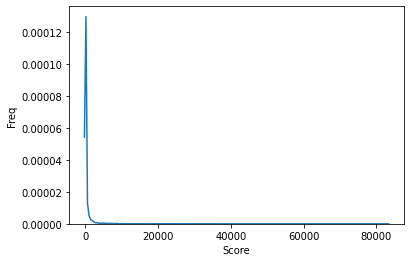

In [ ]:
# Plotting of score column
sns.kdeplot(reddit.score)
plt.xlabel("Score")
plt.ylabel("Freq")

In [ ]:
# Getting most popular post based on num_comments, score.
most_pop_num_comments=reddit.sort_values('num_comments',ascending=False)[['title','score','author','num_comments']].head()
fig2=px.bar(most_pop_num_comments,x='title',y='num_comments',title='Best Reddit Post based on maximum number of comments',hover_data=['author'])
fig2.show()

In [ ]:
most_pop_score=reddit.sort_values('score',ascending=False)[['title','score','author','num_comments']].head()
fig3=px.bar(most_pop_score,x='title',y='score',title='Best Reddit Post based on maximum score',hover_data=['author'])
fig3.show()

In [ ]:
# Posts which are for over 18
print(reddit['over_18'].value_counts())

False    225708
True      24292
Name: over_18, dtype: int64


In [ ]:
reddit['formatted_created_utc']=pd.to_datetime(reddit['created_utc'],unit='s')
reddit

,thumbnail,created_utc,spoiler,locked,hidden,stickied,quarantine,domain,secure_media_embed,title,author,num_comments,permalink,url,subreddit,contest_mode,subreddit_id,score,hide_score,edited,is_self,media_embed,brand_safe,over_18,gilded,formatted_created_utc
0,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,1483228800,False,False,False,False,False,smoothcomp.com,{},South Dakota event next weekend come compete!,sonicbh,0,/r/bjj/comments/5lcgj8/south_dakota_event_next...,https://smoothcomp.com/event/128,bjj,False,t5_2qn02,3,False,False,False,{},True,False,0,2017-01-01 00:00:00
1,default,1483228800,False,False,False,False,False,self.AskReddit,{},What did you think of the ending of Rogue One?,[deleted],7,/r/AskReddit/comments/5lcgj9/what_did_you_thin...,https://www.reddit.com/r/AskReddit/comments/5l...,AskReddit,False,t5_2qh1i,1,False,False,True,{},True,False,0,2017-01-01 00:00:00
2,self,1483228800,False,False,False,False,False,self.ffxiv,{},Noob question about free month.,Troyboy321,4,/r/ffxiv/comments/5lcgja/noob_question_about_f...,https://www.reddit.com/r/ffxiv/comments/5lcgja...,ffxiv,False,t5_2rgs7,5,False,False,True,{},True,False,0,2017-01-01 00:00:00
3,self,1483228800,False,False,False,False,False,self.cigars,{},"It's all about good friends, and Year of the R...",UnjustCustos,15,/r/cigars/comments/5lcgjb/its_all_about_good_f...,https://www.reddit.com/r/cigars/comments/5lcgj...,cigars,False,t5_2r090,4,False,False,True,{},False,False,0,2017-01-01 00:00:00
4,self,1483228801,False,False,False,False,False,self.tipofmytongue,{},[TOMT][song][musician] Children's cassette tap...,strawberriesncream11,4,/r/tipofmytongue/comments/5lcgjc/tomtsongmusic...,https://www.reddit.com/r/tipofmytongue/comment...,tipofmytongue,False,t5_2r4oc,1,False,False,True,{},True,False,0,2017-01-01 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,default,1483317995,False,False,False,False,False,self.FIFA,{},Can't continue the journey?,kendirect,1,/r/FIFA/comments/5liaqe/cant_continue_the_jour...,https://www.reddit.com/r/FIFA/comments/5liaqe/...,FIFA,False,t5_2qxh7,1,False,False,True,{},True,False,0,2017-01-02 00:46:35
249996,default,1483317995,False,False,False,False,False,m.gayboystube.com,{},Wow! Its so big!,[deleted],0,/r/gayporn/comments/5liaqf/wow_its_so_big/,http://m.gayboystube.com/videos/omg-its-so-big...,gayporn,False,t5_2qi0x,7,False,False,False,{},False,True,0,2017-01-02 00:46:35
249997,default,1483317996,False,False,False,False,False,self.relationships,{},Dealing with a breakup,[deleted],1,/r/relationships/comments/5liaqi/dealing_with_...,https://www.reddit.com/r/relationships/comment...,relationships,False,t5_2qjvn,1,False,False,True,{},True,False,0,2017-01-02 00:46:36
249998,https://b.thumbs.redditmedia.com/4HIN5cgOEHmD8...,1483317996,False,False,False,False,False,i.redd.it,{},H1Z1 - KOTK Monatage Eps.1 Theeasyalliance RAN...,TheEasyAllianceTV,1,/r/H1Z1KOTK/comments/5liaqj/h1z1_kotk_monatage...,https://i.redd.it/0g28t93g477y.png,H1Z1KOTK,False,t5_3cbuh,0,False,False,False,{},True,False,0,2017-01-02 00:46:36


In [ ]:
from datetime import datetime
reddit['Day']=reddit['formatted_created_utc'].dt.day
reddit['Month']=reddit['formatted_created_utc'].dt.month
reddit['Year']=reddit['formatted_created_utc'].dt.year
reddit['date_utc']=reddit['formatted_created_utc'].dt.date
reddit.head()

,thumbnail,created_utc,spoiler,locked,hidden,stickied,quarantine,domain,secure_media_embed,title,author,num_comments,permalink,url,subreddit,contest_mode,subreddit_id,score,hide_score,edited,is_self,media_embed,brand_safe,over_18,gilded,formatted_created_utc,Day,Month,Year,date_utc
0,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,1483228800,False,False,False,False,False,smoothcomp.com,{},South Dakota event next weekend come compete!,sonicbh,0,/r/bjj/comments/5lcgj8/south_dakota_event_next...,https://smoothcomp.com/event/128,bjj,False,t5_2qn02,3,False,False,False,{},True,False,0,2017-01-01 00:00:00,1,1,2017,2017-01-01
1,default,1483228800,False,False,False,False,False,self.AskReddit,{},What did you think of the ending of Rogue One?,[deleted],7,/r/AskReddit/comments/5lcgj9/what_did_you_thin...,https://www.reddit.com/r/AskReddit/comments/5l...,AskReddit,False,t5_2qh1i,1,False,False,True,{},True,False,0,2017-01-01 00:00:00,1,1,2017,2017-01-01
2,self,1483228800,False,False,False,False,False,self.ffxiv,{},Noob question about free month.,Troyboy321,4,/r/ffxiv/comments/5lcgja/noob_question_about_f...,https://www.reddit.com/r/ffxiv/comments/5lcgja...,ffxiv,False,t5_2rgs7,5,False,False,True,{},True,False,0,2017-01-01 00:00:00,1,1,2017,2017-01-01
3,self,1483228800,False,False,False,False,False,self.cigars,{},"It's all about good friends, and Year of the R...",UnjustCustos,15,/r/cigars/comments/5lcgjb/its_all_about_good_f...,https://www.reddit.com/r/cigars/comments/5lcgj...,cigars,False,t5_2r090,4,False,False,True,{},False,False,0,2017-01-01 00:00:00,1,1,2017,2017-01-01
4,self,1483228801,False,False,False,False,False,self.tipofmytongue,{},[TOMT][song][musician] Children's cassette tap...,strawberriesncream11,4,/r/tipofmytongue/comments/5lcgjc/tomtsongmusic...,https://www.reddit.com/r/tipofmytongue/comment...,tipofmytongue,False,t5_2r4oc,1,False,False,True,{},True,False,0,2017-01-01 00:00:01,1,1,2017,2017-01-01


In [ ]:
#Number of post posted on each date
post_posted_everday=reddit.groupby('date_utc')['title'].count().reset_index()
post_posted_everday

,date_utc,title
0,2017-01-01,239639
1,2017-01-02,10361


*** Comment Content Based Feature***

**subjectivity**: Count how many times the personal pronoun "I" occurs in a comment.

**is_edited**: edited is a timestamp that indicates when the comment was last edited. Also useful would be a variable that indicates whether the comment was edited or not.

**quoted**: Check if the comment quotes another comment.

**no_quoted**: Check the number of quotes in a comment

In [21]:
# Implement the above
reddit1['subjectivity'] = reddit1['title'].str.count('I ')

In [22]:
# if the comment quotes another comment, indicate that with a boolean
#reddit1['is_quoted'] = reddit1.title.str.contains('&gt;')

In [23]:
reddit1['no_quoted'] = reddit1.title.str.count('&gt;')

***Sentiment Based Features***
This cell will take a few minutes to run.

**senti_neg**: negative score of comment

**senti_neu**: neutral score of comment

**senti_pos**: positive score of comment

**senti_comp**: compound score of comment

In [24]:
pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.1 MB/s 


In [25]:
reddit1

,thumbnail,created_utc,spoiler,locked,hidden,stickied,quarantine,domain,secure_media_embed,title,author,num_comments,permalink,url,subreddit,contest_mode,subreddit_id,score,hide_score,edited,is_self,media_embed,brand_safe,over_18,gilded,subjectivity,no_quoted
0,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,1483228800,False,False,False,False,False,smoothcomp.com,{},South Dakota event next weekend come compete!,sonicbh,0,/r/bjj/comments/5lcgj8/south_dakota_event_next...,https://smoothcomp.com/event/128,bjj,False,t5_2qn02,3,False,False,False,{},True,False,0,0,0
1,default,1483228800,False,False,False,False,False,self.AskReddit,{},What did you think of the ending of Rogue One?,[deleted],7,/r/AskReddit/comments/5lcgj9/what_did_you_thin...,https://www.reddit.com/r/AskReddit/comments/5l...,AskReddit,False,t5_2qh1i,1,False,False,True,{},True,False,0,0,0
2,self,1483228800,False,False,False,False,False,self.ffxiv,{},Noob question about free month.,Troyboy321,4,/r/ffxiv/comments/5lcgja/noob_question_about_f...,https://www.reddit.com/r/ffxiv/comments/5lcgja...,ffxiv,False,t5_2rgs7,5,False,False,True,{},True,False,0,0,0
3,self,1483228800,False,False,False,False,False,self.cigars,{},"It's all about good friends, and Year of the R...",UnjustCustos,15,/r/cigars/comments/5lcgjb/its_all_about_good_f...,https://www.reddit.com/r/cigars/comments/5lcgj...,cigars,False,t5_2r090,4,False,False,True,{},False,False,0,0,0
4,self,1483228801,False,False,False,False,False,self.tipofmytongue,{},[TOMT][song][musician] Children's cassette tap...,strawberriesncream11,4,/r/tipofmytongue/comments/5lcgjc/tomtsongmusic...,https://www.reddit.com/r/tipofmytongue/comment...,tipofmytongue,False,t5_2r4oc,1,False,False,True,{},True,False,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,default,1483317995,False,False,False,False,False,self.FIFA,{},Can't continue the journey?,kendirect,1,/r/FIFA/comments/5liaqe/cant_continue_the_jour...,https://www.reddit.com/r/FIFA/comments/5liaqe/...,FIFA,False,t5_2qxh7,1,False,False,True,{},True,False,0,0,0
249996,default,1483317995,False,False,False,False,False,m.gayboystube.com,{},Wow! Its so big!,[deleted],0,/r/gayporn/comments/5liaqf/wow_its_so_big/,http://m.gayboystube.com/videos/omg-its-so-big...,gayporn,False,t5_2qi0x,7,False,False,False,{},False,True,0,0,0
249997,default,1483317996,False,False,False,False,False,self.relationships,{},Dealing with a breakup,[deleted],1,/r/relationships/comments/5liaqi/dealing_with_...,https://www.reddit.com/r/relationships/comment...,relationships,False,t5_2qjvn,1,False,False,True,{},True,False,0,0,0
249998,https://b.thumbs.redditmedia.com/4HIN5cgOEHmD8...,1483317996,False,False,False,False,False,i.redd.it,{},H1Z1 - KOTK Monatage Eps.1 Theeasyalliance RAN...,TheEasyAllianceTV,1,/r/H1Z1KOTK/comments/5liaqj/h1z1_kotk_monatage...,https://i.redd.it/0g28t93g477y.png,H1Z1KOTK,False,t5_3cbuh,0,False,False,False,{},True,False,0,0,0


In [26]:
#Number of characters in a comment

reddit1['character_count'] = reddit1['title'].map(lambda x : len(x))

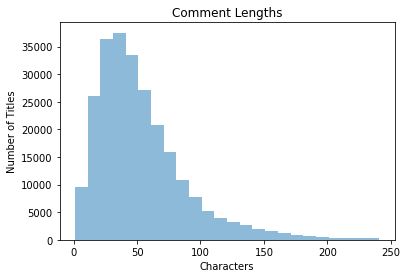

In [26]:
plt.hist(reddit1['character_count'], bins=np.arange(1,250,10), alpha=0.5, label="Character Lengths");
plt.title('Comment Lengths');
plt.xlabel('Characters');
plt.ylabel('Number of Titles');

**More number of titles have character lengths between 0 and 90**

In [27]:
#NUMBER OF WORDS IN THE TITLE

import re
def word_count(text):
    wordList = re.sub("[^\w]", " ",  text).split()
    return len(wordList)

reddit1['word_count'] = reddit1['title'].map(lambda x : word_count(x))

In [28]:
reddit1

,thumbnail,created_utc,spoiler,locked,hidden,stickied,quarantine,domain,secure_media_embed,title,author,num_comments,permalink,url,subreddit,contest_mode,subreddit_id,score,hide_score,edited,is_self,media_embed,brand_safe,over_18,gilded,subjectivity,no_quoted,character_count,word_count
0,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,1483228800,False,False,False,False,False,smoothcomp.com,{},South Dakota event next weekend come compete!,sonicbh,0,/r/bjj/comments/5lcgj8/south_dakota_event_next...,https://smoothcomp.com/event/128,bjj,False,t5_2qn02,3,False,False,False,{},True,False,0,0,0,45,7
1,default,1483228800,False,False,False,False,False,self.AskReddit,{},What did you think of the ending of Rogue One?,[deleted],7,/r/AskReddit/comments/5lcgj9/what_did_you_thin...,https://www.reddit.com/r/AskReddit/comments/5l...,AskReddit,False,t5_2qh1i,1,False,False,True,{},True,False,0,0,0,46,10
2,self,1483228800,False,False,False,False,False,self.ffxiv,{},Noob question about free month.,Troyboy321,4,/r/ffxiv/comments/5lcgja/noob_question_about_f...,https://www.reddit.com/r/ffxiv/comments/5lcgja...,ffxiv,False,t5_2rgs7,5,False,False,True,{},True,False,0,0,0,31,5
3,self,1483228800,False,False,False,False,False,self.cigars,{},"It's all about good friends, and Year of the R...",UnjustCustos,15,/r/cigars/comments/5lcgjb/its_all_about_good_f...,https://www.reddit.com/r/cigars/comments/5lcgj...,cigars,False,t5_2r090,4,False,False,True,{},False,False,0,0,0,50,11
4,self,1483228801,False,False,False,False,False,self.tipofmytongue,{},[TOMT][song][musician] Children's cassette tap...,strawberriesncream11,4,/r/tipofmytongue/comments/5lcgjc/tomtsongmusic...,https://www.reddit.com/r/tipofmytongue/comment...,tipofmytongue,False,t5_2r4oc,1,False,False,True,{},True,False,0,0,0,60,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,default,1483317995,False,False,False,False,False,self.FIFA,{},Can't continue the journey?,kendirect,1,/r/FIFA/comments/5liaqe/cant_continue_the_jour...,https://www.reddit.com/r/FIFA/comments/5liaqe/...,FIFA,False,t5_2qxh7,1,False,False,True,{},True,False,0,0,0,27,5
249996,default,1483317995,False,False,False,False,False,m.gayboystube.com,{},Wow! Its so big!,[deleted],0,/r/gayporn/comments/5liaqf/wow_its_so_big/,http://m.gayboystube.com/videos/omg-its-so-big...,gayporn,False,t5_2qi0x,7,False,False,False,{},False,True,0,0,0,16,4
249997,default,1483317996,False,False,False,False,False,self.relationships,{},Dealing with a breakup,[deleted],1,/r/relationships/comments/5liaqi/dealing_with_...,https://www.reddit.com/r/relationships/comment...,relationships,False,t5_2qjvn,1,False,False,True,{},True,False,0,0,0,22,4
249998,https://b.thumbs.redditmedia.com/4HIN5cgOEHmD8...,1483317996,False,False,False,False,False,i.redd.it,{},H1Z1 - KOTK Monatage Eps.1 Theeasyalliance RAN...,TheEasyAllianceTV,1,/r/H1Z1KOTK/comments/5liaqj/h1z1_kotk_monatage...,https://i.redd.it/0g28t93g477y.png,H1Z1KOTK,False,t5_3cbuh,0,False,False,False,{},True,False,0,0,0,57,9


Text(0, 0.5, 'Score')

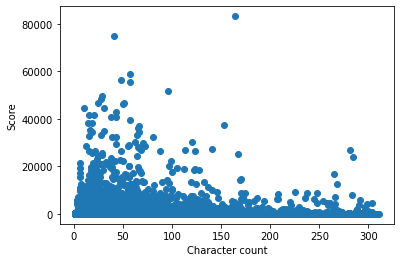

In [90]:
plt.scatter(reddit1['character_count'], reddit1['score'])
plt.xlabel('Character count')
plt.ylabel('Score')

**Scores do not depend on the length of the title**

## Score - Dependent variable

In [ ]:
reddit.score.value_counts()

1        113131
0         22744
2         20012
3         11918
4          6442
          ...  
2652          1
8665          1
1072          1
19513         1
10235         1
Name: score, Length: 2373, dtype: int64

## Gilded

In [ ]:
reddit.gilded.value_counts()

0    249867
1       129
3         2
6         1
2         1
Name: gilded, dtype: int64

## Over_18

In [ ]:
reddit.over_18.value_counts()

False    225708
True      24292
Name: over_18, dtype: int64

## Number_of_comments

In [ ]:
reddit.num_comments.value_counts()

0       95268
1       45626
2       18793
3       12806
4       10480
        ...  
470         1
552         1
853         1
1620        1
1151        1
Name: num_comments, Length: 757, dtype: int64

## Stats for Title column

In [ ]:
num_of_titles = reddit.title.nunique()
max_len_title = max([len(x) for x in reddit['title']])
avg_len_title = int(np.mean([len(x) for x in reddit['title']]))
max_word_count = max([len(x.split()) for x in reddit['title']])
avg_word_count = int(np.mean([len(x.split()) for x in reddit['title']]))

print('Number of unique titles: \t{0}'.format(num_of_titles))
print('Max Length of a title: \t{0} characters'.format(max_len_title))
print('Avg Length of title: \t{0} characters'.format(avg_len_title))
print('Max words in title: \t{0} words'.format(max_word_count))
print('Avg words in title: \t{0} words'.format(avg_word_count))
unique_titles = reddit.title.nunique()
print('#repeated titles:\t', len(reddit) - unique_titles)

Number of unique titles: 	221444
Max Length of a title: 	311 characters
Avg Length of title: 	54 characters
Max words in title: 	84 words
Avg words in title: 	9 words
#repeated titles:	 28556


In [ ]:
#Checking the repeated columns
reddit[reddit.duplicated('title')]

,thumbnail,created_utc,spoiler,locked,hidden,stickied,quarantine,domain,secure_media_embed,title,author,num_comments,permalink,url,subreddit,contest_mode,subreddit_id,score,hide_score,edited,is_self,media_embed,brand_safe,over_18,gilded
143,https://b.thumbs.redditmedia.com/2eKDWSTpR-Qt7...,1483228837,False,False,False,False,False,d1466nnw0ex81e.cloudfront.net,{},Spider-Woman #12 (1979)--Carmine Infantino,ImagesOfNetwork,1,/r/imagesofthe1970s/comments/5lcgnc/spiderwoma...,https://d1466nnw0ex81e.cloudfront.net/n_iv/600...,imagesofthe1970s,False,t5_3a762,1,False,False,False,{},False,False,0
174,self,1483228850,False,False,False,False,False,self.FuckWhitley,{},Happy new year!,Quillbolt_h,1,/r/FuckWhitley/comments/5lcgob/happy_new_year/,https://www.reddit.com/r/FuckWhitley/comments/...,FuckWhitley,False,t5_3h9td,6,False,False,True,{},False,False,0
175,https://b.thumbs.redditmedia.com/gfwL2svqwwxnH...,1483228850,False,False,False,False,False,i.reddituploads.com,{},2016,ImagesOfNetwork,1,/r/ImagesOfThe2010s/comments/5lcgoc/2016/,https://i.reddituploads.com/8d0157f669674990a2...,ImagesOfThe2010s,False,t5_3a77t,1,False,False,False,{},False,False,0
238,https://b.thumbs.redditmedia.com/If4PZxylyGbAK...,1483228869,False,False,False,False,False,i.redd.it,{},"Bonsai Rock, Lake Tahoe, Nevada [OC][5472x3648]",ImagesOfNetwork,1,/r/ImagesOfNevada/comments/5lcgq4/bonsai_rock_...,https://i.redd.it/wyghovu6rz6y.jpg,ImagesOfNevada,False,t5_39g29,4,False,False,False,{},False,False,0
244,https://b.thumbs.redditmedia.com/-2Y3_enfJHg9n...,1483228872,False,False,False,False,False,i.redd.it,{},New Years Login Bonus!,MisterGogeta,63,/r/DBZDokkanBattle/comments/5lcgqa/new_years_l...,https://i.redd.it/wdbc0sderz6y.png,DBZDokkanBattle,False,t5_384a7,51,False,False,False,{},True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249970,default,1483317987,False,False,False,False,False,reddit.com,{},Don't mind me taking out a drone with a spear,dangquocbuu,0,/r/funny/comments/5liapo/dont_mind_me_taking_o...,https://www.reddit.com/r/gifs/comments/5lhfy7/...,funny,False,t5_2qh33,1,False,False,False,{},True,False,0
249974,https://b.thumbs.redditmedia.com/mFks6CQyAO-YB...,1483317988,False,False,False,False,False,imgur.com,"{'height': 550, 'content': '&lt;iframe class=""...",[LC] can i get a quick LC on these 2013 qasas?...,ImagesOfNetwork,1,/r/ImagesOfThe2010s/comments/5liaps/lc_can_i_g...,http://imgur.com/a/V1mSm,ImagesOfThe2010s,False,t5_3a77t,1,False,False,False,"{'scrolling': False, 'height': 550, 'content':...",False,False,0
249980,self,1483317991,False,False,False,False,False,self.VetrainArmy2b2t,{},Rushers are not allowed on this Subreddit! Ple...,AutoModerator,1,/r/VetrainArmy2b2t/comments/5liapy/rushers_are...,https://www.reddit.com/r/VetrainArmy2b2t/comme...,VetrainArmy2b2t,False,t5_3hyg4,1,False,False,True,{},False,False,0
249981,nsfw,1483317991,False,False,False,False,False,google.com,{},Capri Cavalli,Bc727539,0,/r/Capri_Cavalli/comments/5liapz/capri_cavalli/,https://www.google.com/imgres?imgurl=http%3A%2...,Capri_Cavalli,False,t5_3gahu,1,False,False,False,{},False,True,0


**Right skewed distribution of the dependent variable**

In [ ]:
reddit.subreddit.value_counts()


AskReddit               7913
RocketLeagueExchange    7020
removalbot              3124
The_Donald              3042
GlobalOffensiveTrade    2820
                        ... 
VixenCWSeed                1
VivillonPatterns           1
Vivarium                   1
VitaSidorkina              1
000014                     1
Name: subreddit, Length: 20888, dtype: int64

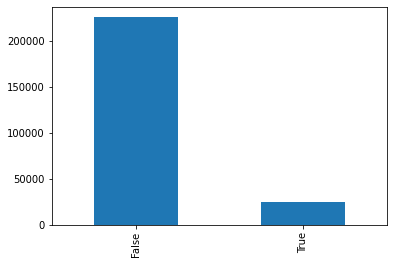

In [ ]:
reddit.over_18.value_counts().plot(kind = 'bar');

**More number of titles are also marked for readers aged < 18**

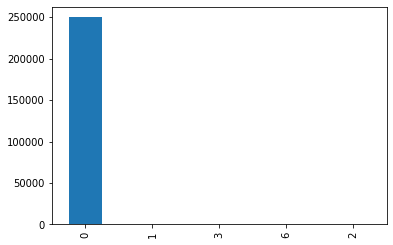

In [ ]:
reddit.gilded.value_counts().plot(kind = 'bar');

**Not a lot of authors were gilded for their posts**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


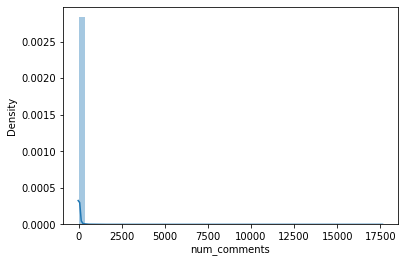

In [ ]:
sns.distplot(reddit["num_comments"]);

In [28]:
#Number of characters in a comment

reddit['character_count'] = reddit['title'].map(lambda x : len(x))

In [27]:
reddit.head(50
            )

,thumbnail,created_utc,spoiler,locked,hidden,stickied,quarantine,domain,secure_media_embed,title,author,num_comments,permalink,url,subreddit,contest_mode,subreddit_id,score,hide_score,edited,is_self,media_embed,brand_safe,over_18,gilded,character_count
0,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,1483228800,False,False,False,False,False,smoothcomp.com,{},South Dakota event next weekend come compete!,sonicbh,0,/r/bjj/comments/5lcgj8/south_dakota_event_next...,https://smoothcomp.com/event/128,bjj,False,t5_2qn02,3,False,False,False,{},True,False,0,45
1,default,1483228800,False,False,False,False,False,self.AskReddit,{},What did you think of the ending of Rogue One?,[deleted],7,/r/AskReddit/comments/5lcgj9/what_did_you_thin...,https://www.reddit.com/r/AskReddit/comments/5l...,AskReddit,False,t5_2qh1i,1,False,False,True,{},True,False,0,46
2,self,1483228800,False,False,False,False,False,self.ffxiv,{},Noob question about free month.,Troyboy321,4,/r/ffxiv/comments/5lcgja/noob_question_about_f...,https://www.reddit.com/r/ffxiv/comments/5lcgja...,ffxiv,False,t5_2rgs7,5,False,False,True,{},True,False,0,31
3,self,1483228800,False,False,False,False,False,self.cigars,{},"It's all about good friends, and Year of the R...",UnjustCustos,15,/r/cigars/comments/5lcgjb/its_all_about_good_f...,https://www.reddit.com/r/cigars/comments/5lcgj...,cigars,False,t5_2r090,4,False,False,True,{},False,False,0,50
4,self,1483228801,False,False,False,False,False,self.tipofmytongue,{},[TOMT][song][musician] Children's cassette tap...,strawberriesncream11,4,/r/tipofmytongue/comments/5lcgjc/tomtsongmusic...,https://www.reddit.com/r/tipofmytongue/comment...,tipofmytongue,False,t5_2r4oc,1,False,False,True,{},True,False,0,60
5,self,1483228801,False,False,False,False,False,self.nba,{},GAME THREAD: New York Knicks (16-16) @ Houston...,Lindsw,856,/r/nba/comments/5lcgjd/game_thread_new_york_kn...,https://www.reddit.com/r/nba/comments/5lcgjd/g...,nba,False,t5_2qo4s,35,False,1483233121,True,{},True,False,0,79
6,self,1483228801,False,False,False,False,False,self.every15min,{},"Currently, it's December 31, 2016 at 07:00PM",erer1243,0,/r/every15min/comments/5lcgje/currently_its_de...,https://www.reddit.com/r/every15min/comments/5...,every15min,False,t5_35ymv,1,False,False,True,{},False,False,0,44
7,default,1483228802,False,False,False,False,False,self.nbastreams,{},Game Thread: Houston Rockets vs New York Knick...,NBAstreamsbotv2,8,/r/nbastreams/comments/5lcgjf/game_thread_hous...,https://www.reddit.com/r/nbastreams/comments/5...,nbastreams,False,t5_340mn,20,False,False,True,{},False,False,0,61
8,default,1483228803,False,False,False,False,False,self.gwpublic,{},Good Internet dating site with a lot of differ...,Marissacotrui,0,/r/gwpublic/comments/5lcgjg/good_internet_dati...,https://www.reddit.com/r/gwpublic/comments/5lc...,gwpublic,False,t5_2wssl,1,False,False,True,{},False,True,0,119
9,self,1483228803,False,False,False,False,False,self.writing,{},Examples of good writing?,Xanhil,7,/r/writing/comments/5lcgjh/examples_of_good_wr...,https://www.reddit.com/r/writing/comments/5lcg...,writing,False,t5_2qh2n,0,False,False,True,{},True,False,0,25


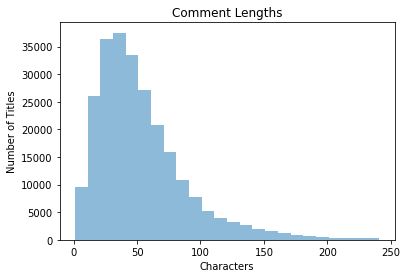

In [ ]:
plt.hist(reddit['character_count'], bins=np.arange(1,250,10), alpha=0.5, label="Character Lengths");
plt.title('Comment Lengths');
plt.xlabel('Characters');
plt.ylabel('Number of Titles');

**More number of titles have character lengths between 0 and 90 **

## Text cleaning of the  title

In [29]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [30]:
#Downloading stopwords from NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.remove("not")
stop_words.remove("no")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [31]:
#Enforcing proper spacing

def spaceURLs(df, column):
    data = df.copy()
    data.loc[:, column] = data[column].str.replace('\[|\]', ' ', regex=True)
    return data


#Replace URLs

def replaceURL(df, column):
    data = df.copy()
    data.loc[:, column] = data[column].str.replace('\(http\S+', 'URL', regex=True)
    return data


#Removing symbols

def removeSymbols(df, column):
    data = df.copy()
    data.loc[:, column] = data[column].str.replace('/r/', '', regex=True)
    data.loc[:, column] = data[column].str.replace('[^\.\'A-Za-z0-9]+', ' ', regex=True)
    return data


#Removing numbers

def removeNumbers(df, column):
    data = df.copy()
    data.loc[:, column] = data[column].str.replace('\S*\d\S*', '', regex=True)
    return data


#Remove stop words

stop_words = stopwords.words('english')
stop_words.extend(["ca","http"])
def no_stop_words(list_tokens):    
    tokens_no_stop_word = []
    for elt in list_tokens: 
        tokens_no_stop_word.append([tok for tok in elt if tok not in stop_words])
    return(tokens_no_stop_word)

In [32]:
data = spaceURLs(reddit1, 'title')
data = replaceURL(reddit1, 'title')
data = removeNumbers(reddit1, 'title')
data = removeSymbols(reddit1, 'title')

In [34]:
data.head()

,thumbnail,created_utc,spoiler,locked,hidden,stickied,quarantine,domain,secure_media_embed,title,author,num_comments,permalink,url,subreddit,contest_mode,subreddit_id,score,hide_score,edited,is_self,media_embed,brand_safe,over_18,gilded,subjectivity,no_quoted,character_count,word_count
0,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,1483228800,False,False,False,False,False,smoothcomp.com,{},South Dakota event next weekend come compete,sonicbh,0,/r/bjj/comments/5lcgj8/south_dakota_event_next...,https://smoothcomp.com/event/128,bjj,False,t5_2qn02,3,False,False,False,{},True,False,0,0,0,45,7
1,default,1483228800,False,False,False,False,False,self.AskReddit,{},What did you think of the ending of Rogue One,[deleted],7,/r/AskReddit/comments/5lcgj9/what_did_you_thin...,https://www.reddit.com/r/AskReddit/comments/5l...,AskReddit,False,t5_2qh1i,1,False,False,True,{},True,False,0,0,0,46,10
2,self,1483228800,False,False,False,False,False,self.ffxiv,{},Noob question about free month.,Troyboy321,4,/r/ffxiv/comments/5lcgja/noob_question_about_f...,https://www.reddit.com/r/ffxiv/comments/5lcgja...,ffxiv,False,t5_2rgs7,5,False,False,True,{},True,False,0,0,0,31,5
3,self,1483228800,False,False,False,False,False,self.cigars,{},It's all about good friends and Year of the Rats.,UnjustCustos,15,/r/cigars/comments/5lcgjb/its_all_about_good_f...,https://www.reddit.com/r/cigars/comments/5lcgj...,cigars,False,t5_2r090,4,False,False,True,{},False,False,0,0,0,50,11
4,self,1483228801,False,False,False,False,False,self.tipofmytongue,{},TOMT song musician Children's cassette tape f...,strawberriesncream11,4,/r/tipofmytongue/comments/5lcgjc/tomtsongmusic...,https://www.reddit.com/r/tipofmytongue/comment...,tipofmytongue,False,t5_2r4oc,1,False,False,True,{},True,False,0,0,0,60,10


In [ ]:
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
thumbnail,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,default,self,self,self,self,self,default,default,self
created_utc,1483228800,1483228800,1483228800,1483228800,1483228801,1483228801,1483228801,1483228802,1483228803,1483228803
spoiler,False,False,False,False,False,False,False,False,False,False
locked,False,False,False,False,False,False,False,False,False,False
hidden,False,False,False,False,False,False,False,False,False,False
stickied,False,False,False,False,False,False,False,False,False,False
quarantine,False,False,False,False,False,False,False,False,False,False
domain,smoothcomp.com,self.AskReddit,self.ffxiv,self.cigars,self.tipofmytongue,self.nba,self.every15min,self.nbastreams,self.gwpublic,self.writing
secure_media_embed,{},{},{},{},{},{},{},{},{},{}
title,South Dakota event next weekend come compete,What did you think of the ending of Rogue One,Noob question about free month.,It's all about good friends and Year of the Rats.,TOMT song musician Children's cassette tape f...,GAME THREAD New York Knicks 16 16 Houston Rock...,Currently it's December 31 2016 at 07 00PM,Game Thread Houston Rockets vs New York Knicks...,Good Internet dating site with a lot of differ...,Examples of good writing


In [33]:
reddit2 = data.copy()

## Sentiment Analysis

### The sentiment function of textblob returns two properties, *polarity*, and *subjectivity*.

- Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 

- Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [34]:
from textblob import TextBlob

In [35]:
# Create a function to get the polarity
def Polarity(text):
      return  TextBlob(text).sentiment.polarity

In [36]:
reddit2['Polarity'] = reddit2['title'].apply(Polarity)

In [36]:
reddit2.head(2)

,thumbnail,created_utc,spoiler,locked,hidden,stickied,quarantine,domain,secure_media_embed,title,author,num_comments,permalink,url,subreddit,contest_mode,subreddit_id,score,hide_score,edited,is_self,media_embed,brand_safe,over_18,gilded,subjectivity,no_quoted,character_count,word_count,Polarity
0,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,1483228800,False,False,False,False,False,smoothcomp.com,{},South Dakota event next weekend come compete,sonicbh,0,/r/bjj/comments/5lcgj8/south_dakota_event_next...,https://smoothcomp.com/event/128,bjj,False,t5_2qn02,3,False,False,False,{},True,False,0,0,0,45,7,0.0
1,default,1483228800,False,False,False,False,False,self.AskReddit,{},What did you think of the ending of Rogue One,[deleted],7,/r/AskReddit/comments/5lcgj9/what_did_you_thin...,https://www.reddit.com/r/AskReddit/comments/5l...,AskReddit,False,t5_2qh1i,1,False,False,True,{},True,False,0,0,0,46,10,0.0


In [39]:
pip install vaderSentiment

In [37]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive).


positive sentiment : (compound score >= 0.05) 

neutral sentiment : (compound score > -0.05) and (compound score < 0.05) 

negative sentiment : (compound score <= -0.05)

In [38]:
senti = SentimentIntensityAnalyzer()
for sentence in reddit['title']:
    ss = senti.polarity_scores(sentence)

In [42]:

import pickle
pickle.dump(senti, open('senti.pkl','wb'))

In [39]:
reddit2['rating'] = reddit2['title'].apply(senti.polarity_scores)

In [44]:
reddit2.head(2)

,thumbnail,created_utc,spoiler,locked,hidden,stickied,quarantine,domain,secure_media_embed,title,author,num_comments,permalink,url,subreddit,contest_mode,subreddit_id,score,hide_score,edited,is_self,media_embed,brand_safe,over_18,gilded,subjectivity,no_quoted,character_count,word_count,Polarity,rating
0,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,1483228800,False,False,False,False,False,smoothcomp.com,{},South Dakota event next weekend come compete,sonicbh,0,/r/bjj/comments/5lcgj8/south_dakota_event_next...,https://smoothcomp.com/event/128,bjj,False,t5_2qn02,3,False,False,False,{},True,False,0,0,0,45,7,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,default,1483228800,False,False,False,False,False,self.AskReddit,{},What did you think of the ending of Rogue One,[deleted],7,/r/AskReddit/comments/5lcgj9/what_did_you_thin...,https://www.reddit.com/r/AskReddit/comments/5l...,AskReddit,False,t5_2qh1i,1,False,False,True,{},True,False,0,0,0,46,10,0.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [40]:
reddit3 = pd.concat([reddit2.drop(['rating'], axis=1), reddit2['rating'].apply(pd.Series)], axis=1)

In [41]:
# data preprocessing
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import re
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer,PorterStemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def text_preprocess(text):
    text = re.sub(r'[^\w\s]', '', text) 
    l_text = [word for word in text.lower().split() if word not in ENGLISH_STOP_WORDS]
    stem_words = [stemmer.stem(w) for w in l_text]
    lemma_words = [lemmatizer.lemmatize(w) for w in l_text]

    return " ".join(lemma_words)

reddit3['title'] = reddit3['title'].map(lambda x : text_preprocess(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [45]:
reddit3

,thumbnail,created_utc,spoiler,locked,hidden,stickied,quarantine,domain,secure_media_embed,title,author,num_comments,permalink,url,subreddit,contest_mode,subreddit_id,score,hide_score,edited,is_self,media_embed,brand_safe,over_18,gilded,subjectivity,no_quoted,character_count,word_count,Polarity,neg,neu,pos,compound
0,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,1483228800,False,False,False,False,False,smoothcomp.com,{},south dakota event weekend come compete,sonicbh,0,/r/bjj/comments/5lcgj8/south_dakota_event_next...,https://smoothcomp.com/event/128,bjj,False,t5_2qn02,3,False,False,False,{},True,False,0,0,0,45,7,0.00,0.000,1.000,0.000,0.0000
1,default,1483228800,False,False,False,False,False,self.AskReddit,{},did think ending rogue,[deleted],7,/r/AskReddit/comments/5lcgj9/what_did_you_thin...,https://www.reddit.com/r/AskReddit/comments/5l...,AskReddit,False,t5_2qh1i,1,False,False,True,{},True,False,0,0,0,46,10,0.00,0.000,1.000,0.000,0.0000
2,self,1483228800,False,False,False,False,False,self.ffxiv,{},noob question free month,Troyboy321,4,/r/ffxiv/comments/5lcgja/noob_question_about_f...,https://www.reddit.com/r/ffxiv/comments/5lcgja...,ffxiv,False,t5_2rgs7,5,False,False,True,{},True,False,0,0,0,31,5,0.40,0.160,0.400,0.440,0.4767
3,self,1483228800,False,False,False,False,False,self.cigars,{},good friend year rat,UnjustCustos,15,/r/cigars/comments/5lcgjb/its_all_about_good_f...,https://www.reddit.com/r/cigars/comments/5lcgj...,cigars,False,t5_2r090,4,False,False,True,{},False,False,0,0,0,50,11,0.70,0.000,0.571,0.429,0.7184
4,self,1483228801,False,False,False,False,False,self.tipofmytongue,{},tomt song musician childrens cassette tape 90,strawberriesncream11,4,/r/tipofmytongue/comments/5lcgjc/tomtsongmusic...,https://www.reddit.com/r/tipofmytongue/comment...,tipofmytongue,False,t5_2r4oc,1,False,False,True,{},True,False,0,0,0,60,10,0.00,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,default,1483317995,False,False,False,False,False,self.FIFA,{},continue journey,kendirect,1,/r/FIFA/comments/5liaqe/cant_continue_the_jour...,https://www.reddit.com/r/FIFA/comments/5liaqe/...,FIFA,False,t5_2qxh7,1,False,False,True,{},True,False,0,0,0,27,5,0.00,0.000,1.000,0.000,0.0000
249996,default,1483317995,False,False,False,False,False,m.gayboystube.com,{},wow big,[deleted],0,/r/gayporn/comments/5liaqf/wow_its_so_big/,http://m.gayboystube.com/videos/omg-its-so-big...,gayporn,False,t5_2qi0x,7,False,False,False,{},False,True,0,0,0,16,4,0.05,0.000,0.441,0.559,0.5859
249997,default,1483317996,False,False,False,False,False,self.relationships,{},dealing breakup,[deleted],1,/r/relationships/comments/5liaqi/dealing_with_...,https://www.reddit.com/r/relationships/comment...,relationships,False,t5_2qjvn,1,False,False,True,{},True,False,0,0,0,22,4,0.00,0.000,1.000,0.000,0.0000
249998,https://b.thumbs.redditmedia.com/4HIN5cgOEHmD8...,1483317996,False,False,False,False,False,i.redd.it,{},h1z1 kotk monatage eps1 theeasyalliance rank 2...,TheEasyAllianceTV,1,/r/H1Z1KOTK/comments/5liaqj/h1z1_kotk_monatage...,https://i.redd.it/0g28t93g477y.png,H1Z1KOTK,False,t5_3cbuh,0,False,False,False,{},True,False,0,0,0,57,9,-0.80,0.000,1.000,0.000,0.0000


In [46]:
reddit3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   thumbnail           250000 non-null  object  
 1   created_utc         250000 non-null  int64   
 2   spoiler             250000 non-null  bool    
 3   locked              250000 non-null  bool    
 4   hidden              250000 non-null  bool    
 5   stickied            250000 non-null  bool    
 6   quarantine          250000 non-null  bool    
 7   domain              250000 non-null  object  
 8   secure_media_embed  250000 non-null  object  
 9   title               250000 non-null  object  
 10  author              250000 non-null  object  
 11  num_comments        250000 non-null  int64   
 12  permalink           250000 non-null  object  
 13  url                 250000 non-null  category
 14  subreddit           250000 non-null  category
 15  contest_mode     

In [47]:
reddit3["spoiler"].value_counts()

False    249764
True        236
Name: spoiler, dtype: int64

In [168]:
reddit3["locked"].value_counts() 

False    249578
True        422
Name: locked, dtype: int64

In [169]:
reddit3["hidden"].value_counts()

False    250000
Name: hidden, dtype: int64

In [170]:
reddit3["stickied"].value_counts()

False    249858
True        142
Name: stickied, dtype: int64

In [171]:
reddit3["quarantine"].value_counts()

False    250000
Name: quarantine, dtype: int64

In [172]:
reddit3["over_18"].value_counts()

False    225708
True      24292
Name: over_18, dtype: int64

In [173]:
reddit3["brand_safe"].value_counts()

True     147614
False    102386
Name: brand_safe, dtype: int64

In [174]:
reddit3["contest_mode"].value_counts()

False    249885
True        115
Name: contest_mode, dtype: int64

In [175]:
reddit3["is_self"].value_counts()

True     126420
False    123580
Name: is_self, dtype: int64

In [176]:
reddit3["hide_score"].value_counts()

False    250000
Name: hide_score, dtype: int64

In [42]:
reddit3.drop(["spoiler", "locked" ,"hidden" ,"stickied", "quarantine" ,"contest_mode" ,"hide_score","subreddit", "brand_safe"],axis=1, inplace=True)

In [227]:
reddit3

,thumbnail,created_utc,domain,secure_media_embed,title,author,num_comments,permalink,url,subreddit_id,score,edited,is_self,media_embed,over_18,gilded,subjectivity,no_quoted,character_count,word_count,Polarity,neg,neu,pos,compound
0,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,1483228800,smoothcomp.com,{},south dakota event weekend come compete,sonicbh,0,/r/bjj/comments/5lcgj8/south_dakota_event_next...,https://smoothcomp.com/event/128,t5_2qn02,3,False,False,{},False,0,0,0,45,7,0.00,0.000,1.000,0.000,0.0000
1,default,1483228800,self.AskReddit,{},did think ending rogue,[deleted],7,/r/AskReddit/comments/5lcgj9/what_did_you_thin...,https://www.reddit.com/r/AskReddit/comments/5l...,t5_2qh1i,1,False,True,{},False,0,0,0,46,10,0.00,0.000,1.000,0.000,0.0000
2,self,1483228800,self.ffxiv,{},noob question free month,Troyboy321,4,/r/ffxiv/comments/5lcgja/noob_question_about_f...,https://www.reddit.com/r/ffxiv/comments/5lcgja...,t5_2rgs7,5,False,True,{},False,0,0,0,31,5,0.40,0.160,0.400,0.440,0.4767
3,self,1483228800,self.cigars,{},good friend year rat,UnjustCustos,15,/r/cigars/comments/5lcgjb/its_all_about_good_f...,https://www.reddit.com/r/cigars/comments/5lcgj...,t5_2r090,4,False,True,{},False,0,0,0,50,11,0.70,0.000,0.571,0.429,0.7184
4,self,1483228801,self.tipofmytongue,{},tomt song musician childrens cassette tape 90,strawberriesncream11,4,/r/tipofmytongue/comments/5lcgjc/tomtsongmusic...,https://www.reddit.com/r/tipofmytongue/comment...,t5_2r4oc,1,False,True,{},False,0,0,0,60,10,0.00,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,default,1483317995,self.FIFA,{},continue journey,kendirect,1,/r/FIFA/comments/5liaqe/cant_continue_the_jour...,https://www.reddit.com/r/FIFA/comments/5liaqe/...,t5_2qxh7,1,False,True,{},False,0,0,0,27,5,0.00,0.000,1.000,0.000,0.0000
249996,default,1483317995,m.gayboystube.com,{},wow big,[deleted],0,/r/gayporn/comments/5liaqf/wow_its_so_big/,http://m.gayboystube.com/videos/omg-its-so-big...,t5_2qi0x,7,False,False,{},True,0,0,0,16,4,0.05,0.000,0.441,0.559,0.5859
249997,default,1483317996,self.relationships,{},dealing breakup,[deleted],1,/r/relationships/comments/5liaqi/dealing_with_...,https://www.reddit.com/r/relationships/comment...,t5_2qjvn,1,False,True,{},False,0,0,0,22,4,0.00,0.000,1.000,0.000,0.0000
249998,https://b.thumbs.redditmedia.com/4HIN5cgOEHmD8...,1483317996,i.redd.it,{},h1z1 kotk monatage eps1 theeasyalliance rank 2...,TheEasyAllianceTV,1,/r/H1Z1KOTK/comments/5liaqj/h1z1_kotk_monatage...,https://i.redd.it/0g28t93g477y.png,t5_3cbuh,0,False,False,{},False,0,0,0,57,9,-0.80,0.000,1.000,0.000,0.0000


In [43]:
reddit3.drop(["permalink"	,"url"],axis=1, inplace=True)

In [229]:
reddit3


,thumbnail,created_utc,domain,secure_media_embed,title,author,num_comments,subreddit_id,score,edited,is_self,media_embed,over_18,gilded,subjectivity,no_quoted,character_count,word_count,Polarity,neg,neu,pos,compound
0,https://b.thumbs.redditmedia.com/ZchXykM_bboD2...,1483228800,smoothcomp.com,{},south dakota event weekend come compete,sonicbh,0,t5_2qn02,3,False,False,{},False,0,0,0,45,7,0.00,0.000,1.000,0.000,0.0000
1,default,1483228800,self.AskReddit,{},did think ending rogue,[deleted],7,t5_2qh1i,1,False,True,{},False,0,0,0,46,10,0.00,0.000,1.000,0.000,0.0000
2,self,1483228800,self.ffxiv,{},noob question free month,Troyboy321,4,t5_2rgs7,5,False,True,{},False,0,0,0,31,5,0.40,0.160,0.400,0.440,0.4767
3,self,1483228800,self.cigars,{},good friend year rat,UnjustCustos,15,t5_2r090,4,False,True,{},False,0,0,0,50,11,0.70,0.000,0.571,0.429,0.7184
4,self,1483228801,self.tipofmytongue,{},tomt song musician childrens cassette tape 90,strawberriesncream11,4,t5_2r4oc,1,False,True,{},False,0,0,0,60,10,0.00,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,default,1483317995,self.FIFA,{},continue journey,kendirect,1,t5_2qxh7,1,False,True,{},False,0,0,0,27,5,0.00,0.000,1.000,0.000,0.0000
249996,default,1483317995,m.gayboystube.com,{},wow big,[deleted],0,t5_2qi0x,7,False,False,{},True,0,0,0,16,4,0.05,0.000,0.441,0.559,0.5859
249997,default,1483317996,self.relationships,{},dealing breakup,[deleted],1,t5_2qjvn,1,False,True,{},False,0,0,0,22,4,0.00,0.000,1.000,0.000,0.0000
249998,https://b.thumbs.redditmedia.com/4HIN5cgOEHmD8...,1483317996,i.redd.it,{},h1z1 kotk monatage eps1 theeasyalliance rank 2...,TheEasyAllianceTV,1,t5_3cbuh,0,False,False,{},False,0,0,0,57,9,-0.80,0.000,1.000,0.000,0.0000


In [44]:
reddit3.drop(["thumbnail"	,"subreddit_id","author","secure_media_embed"],axis=1, inplace=True)

In [45]:
reddit3.drop(["created_utc"],axis=1, inplace=True)

In [46]:
reddit3.drop(["title"],axis=1, inplace=True)

In [47]:
reddit3.drop(["edited"	,"domain","media_embed"],axis=1, inplace=True)

In [234]:
reddit3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   num_comments     250000 non-null  int64  
 1   score            250000 non-null  int64  
 2   is_self          250000 non-null  bool   
 3   over_18          250000 non-null  bool   
 4   gilded           250000 non-null  int64  
 5   subjectivity     250000 non-null  int64  
 6   no_quoted        250000 non-null  int64  
 7   character_count  250000 non-null  int64  
 8   word_count       250000 non-null  int64  
 9   Polarity         250000 non-null  float64
 10  neg              250000 non-null  float64
 11  neu              250000 non-null  float64
 12  pos              250000 non-null  float64
 13  compound         250000 non-null  float64
dtypes: bool(2), float64(5), int64(7)
memory usage: 23.4 MB


In [48]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from scipy.sparse import hstack

In [49]:
X = reddit3.drop(['score'], axis = 1)
y = reddit3.score

In [50]:
X

,num_comments,is_self,over_18,gilded,subjectivity,no_quoted,character_count,word_count,Polarity,neg,neu,pos,compound
0,0,False,False,0,0,0,45,7,0.00,0.000,1.000,0.000,0.0000
1,7,True,False,0,0,0,46,10,0.00,0.000,1.000,0.000,0.0000
2,4,True,False,0,0,0,31,5,0.40,0.160,0.400,0.440,0.4767
3,15,True,False,0,0,0,50,11,0.70,0.000,0.571,0.429,0.7184
4,4,True,False,0,0,0,60,10,0.00,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1,True,False,0,0,0,27,5,0.00,0.000,1.000,0.000,0.0000
249996,0,False,True,0,0,0,16,4,0.05,0.000,0.441,0.559,0.5859
249997,1,True,False,0,0,0,22,4,0.00,0.000,1.000,0.000,0.0000
249998,1,False,False,0,0,0,57,9,-0.80,0.000,1.000,0.000,0.0000


In [51]:
import pickle 
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['over_18']])
pickle.dump(ohe, open('encoding.pkl','wb'))
col_names = [j for sub in ohe.categories_ for j in sub]

In [57]:
col_names

[False, True]

In [52]:
trans = ohe.transform(X[['over_18']])

In [59]:
trans

<250000x2 sparse matrix of type '<class 'numpy.float64'>'
	with 250000 stored elements in Compressed Sparse Row format>

In [53]:
encoded= pd.DataFrame(trans.todense(), columns=col_names)

In [243]:
encoded

,False,True
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
249995,1.0,0.0
249996,0.0,1.0
249997,1.0,0.0
249998,1.0,0.0


In [54]:
import pickle 
from sklearn.preprocessing import OneHotEncoder

ohe1 = OneHotEncoder(handle_unknown='ignore')
ohe1.fit(X[['is_self']])
pickle.dump(ohe1, open('encoding1.pkl','wb'))
col_names1 = [j for sub in ohe1.categories_ for j in sub]

In [55]:
trans1 = ohe1.transform(X[['is_self']])
encoded1= pd.DataFrame(trans1.todense(), columns=col_names1)

In [246]:
encoded1

,False,True
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
249995,0.0,1.0
249996,1.0,0.0
249997,0.0,1.0
249998,1.0,0.0


In [247]:
X

,num_comments,is_self,over_18,gilded,subjectivity,no_quoted,character_count,word_count,Polarity,neg,neu,pos,compound
0,0,False,False,0,0,0,45,7,0.00,0.000,1.000,0.000,0.0000
1,7,True,False,0,0,0,46,10,0.00,0.000,1.000,0.000,0.0000
2,4,True,False,0,0,0,31,5,0.40,0.160,0.400,0.440,0.4767
3,15,True,False,0,0,0,50,11,0.70,0.000,0.571,0.429,0.7184
4,4,True,False,0,0,0,60,10,0.00,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1,True,False,0,0,0,27,5,0.00,0.000,1.000,0.000,0.0000
249996,0,False,True,0,0,0,16,4,0.05,0.000,0.441,0.559,0.5859
249997,1,True,False,0,0,0,22,4,0.00,0.000,1.000,0.000,0.0000
249998,1,False,False,0,0,0,57,9,-0.80,0.000,1.000,0.000,0.0000


In [56]:
X = pd.concat([X,encoded,encoded1], axis=1)

In [57]:
X.drop(["is_self", "over_18"], axis=1, inplace=True)

In [144]:
X

,num_comments,gilded,subjectivity,is_quoted,no_quoted,character_count,word_count,Polarity,neg,neu,pos,compound,False,True,False,True
0,0,0,0,False,0,45,7,0.00,0.000,1.000,0.000,0.0000,1.0,0.0,1.0,0.0
1,7,0,0,False,0,46,10,0.00,0.000,1.000,0.000,0.0000,1.0,0.0,0.0,1.0
2,4,0,0,False,0,31,5,0.40,0.160,0.400,0.440,0.4767,1.0,0.0,0.0,1.0
3,15,0,0,False,0,50,11,0.70,0.000,0.571,0.429,0.7184,1.0,0.0,0.0,1.0
4,4,0,0,False,0,60,10,0.00,0.000,1.000,0.000,0.0000,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1,0,0,False,0,27,5,0.00,0.000,1.000,0.000,0.0000,1.0,0.0,0.0,1.0
249996,0,0,0,False,0,16,4,0.05,0.000,0.441,0.559,0.5859,0.0,1.0,1.0,0.0
249997,1,0,0,False,0,22,4,0.00,0.000,1.000,0.000,0.0000,1.0,0.0,0.0,1.0
249998,1,0,0,False,0,57,9,-0.80,0.000,1.000,0.000,0.0000,1.0,0.0,1.0,0.0


In [58]:
X= X.rename(columns={X.columns[13]: 'False2'})

In [59]:
X = X.rename(columns={X.columns[14]: 'True2'})

In [60]:
cols = []
count = 1
for column in X.columns:
    if column == 'False2':
        cols.append(f'False_{count}')
        count+=1
        continue
    cols.append(column)
X.columns = cols

In [61]:
cols = []
count = 1
for column in X.columns:
    if column == 'True2':
        cols.append(f'True_{count}')
        count+=1
        continue
    cols.append(column)
X.columns = cols

In [62]:
X

,num_comments,gilded,subjectivity,no_quoted,character_count,word_count,Polarity,neg,neu,pos,compound,False_1,True_1,False_2,True_2
0,0,0,0,0,45,7,0.00,0.000,1.000,0.000,0.0000,1.0,0.0,1.0,0.0
1,7,0,0,0,46,10,0.00,0.000,1.000,0.000,0.0000,1.0,0.0,0.0,1.0
2,4,0,0,0,31,5,0.40,0.160,0.400,0.440,0.4767,1.0,0.0,0.0,1.0
3,15,0,0,0,50,11,0.70,0.000,0.571,0.429,0.7184,1.0,0.0,0.0,1.0
4,4,0,0,0,60,10,0.00,0.000,1.000,0.000,0.0000,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,1,0,0,0,27,5,0.00,0.000,1.000,0.000,0.0000,1.0,0.0,0.0,1.0
249996,0,0,0,0,16,4,0.05,0.000,0.441,0.559,0.5859,0.0,1.0,1.0,0.0
249997,1,0,0,0,22,4,0.00,0.000,1.000,0.000,0.0000,1.0,0.0,0.0,1.0
249998,1,0,0,0,57,9,-0.80,0.000,1.000,0.000,0.0000,1.0,0.0,1.0,0.0


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

In [64]:
X_train

,num_comments,gilded,subjectivity,no_quoted,character_count,word_count,Polarity,neg,neu,pos,compound,False_1,True_1,False_2,True_2
61557,2,0,0,0,65,11,0.250000,0.000,1.000,0.0,0.0000,1.0,0.0,1.0,0.0
113665,1,0,0,0,107,22,-0.031250,0.000,1.000,0.0,0.0000,1.0,0.0,1.0,0.0
4083,0,0,0,0,69,11,0.000000,0.153,0.847,0.0,-0.2023,1.0,0.0,1.0,0.0
215177,2,0,0,0,57,7,0.000000,0.000,1.000,0.0,0.0000,1.0,0.0,0.0,1.0
207478,0,0,0,0,43,8,0.000000,0.000,1.000,0.0,0.0000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218868,4,0,0,0,36,6,0.000000,0.000,1.000,0.0,0.0000,1.0,0.0,0.0,1.0
164706,0,0,0,0,71,11,0.195455,0.099,0.901,0.0,-0.0258,1.0,0.0,1.0,0.0
229450,8,0,0,0,30,5,0.000000,0.000,1.000,0.0,0.0000,1.0,0.0,0.0,1.0
178352,0,0,0,0,26,5,0.000000,0.000,1.000,0.0,0.0000,1.0,0.0,0.0,1.0


In [65]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
def model_scores(model):
    train_pred = model.predict(X_train)
    r2 = r2_score(y_train, train_pred)
    mse = mean_squared_error(y_train, train_pred)
    mae = mean_absolute_error(y_train, train_pred)
    print(f"R-Sq of train data: {r2:.4}")
    print(f"RMSE of train data: {np.sqrt(mse)}")
    print(f"MAE  of train data: {mae}")
    print("*"*10)
    
    y_predicted = model.predict(X_test)
    r2 = r2_score(y_test, y_predicted)
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    print(f"R-Sq of test data: {r2:.4}")
    print(f"RMSE of test data: {np.sqrt(mse)}")
    print(f"MAE of test data: {mae}")
    
    return [r2,np.sqrt(mse),mae]  

model_metrics = dict()

In [66]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
linear.fit(X_train,y_train)
model_metrics["Linear Regression"] = model_scores(linear)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


R-Sq of train data: 0.1428
RMSE of train data: 667.2071307147274
MAE  of train data: 79.02222777205711
**********
R-Sq of test data: 0.1652
RMSE of test data: 808.0524776441896
MAE of test data: 84.98405169150249


In [67]:
import pickle 
pickle.dump(linear, open("model_dec.pkl",'wb'))

In [1]:
from sklearn.tree import DecisionTreeRegressor
DecTree= DecisionTreeRegressor()

In [68]:
DecTree.fit(X_train, y_train)
model_metrics["Decision Trees"] = model_scores(DecTree)

R-Sq of train data: 0.9987
RMSE of train data: 25.586636977389126
MAE  of train data: 3.666238653267986
**********
R-Sq of test data: 0.1039
RMSE of test data: 837.2067910016216
MAE of test data: 70.64326557105682


In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
model_metrics["XGBoost"] = model_scores(xgb)

[21:37:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-Sq of train data: 0.6116
RMSE of train data: 449.0944365846812
MAE  of train data: 51.13571645383954
**********
R-Sq of test data: 0.4595
RMSE of test data: 650.2192687964528
MAE of test data: 59.40813075914621


In [ ]:
from sklearn.model_selection import GridSearchCV
xgbr_cv= GridSearchCV(XGBRegressor(),param_grid=[{'nthread':[4],
                                                  'learning_rate': [.03, 0.05, .07], 
                                                  'max_depth': [5, 6, 7],
                                                  'subsample': [0.7],
                                       ""           'colsample_bytree': [0.7],
                                                  'n_estimators': [500]}],
                                                   cv = 2,
                                                   n_jobs = 5,
                                                   verbose=True)

In [ ]:
xgbr_cv.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[21:59:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, estimator=XGBRegressor(), n_jobs=5,
             param_grid=[{'colsample_bytree': [0.7],
                          'learning_rate': [0.03, 0.05, 0.07],
                          'max_depth': [5, 6, 7], 'n_estimators': [500],
                          'nthread': [4], 'subsample': [0.7]}],
             verbose=True)

In [ ]:
xgbr_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'n_estimators': 500,
 'nthread': 4,
 'subsample': 0.7}

In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth= 5, n_estimators= 500,
                        nthread= 4, subsample= 0.7)
xgbr.fit(X_train, y_train)
model_metrics["XG Boost Regression"] = model_scores(xgbr)

[20:56:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [75]:
xgbr.save_model('model.json')

In [261]:
import pickle 
pickle.dump(xgbr, open("model1.pkl",'wb'))
model1=pickle.load(open("model1.pkl",'rb'))

[12:50:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


**Predictions**

In [70]:
import pickle 
model1=pickle.load(open("model_dec.pkl",'rb'))

In [69]:
pip install praw

     |████████████████████████████████| 176 kB 5.2 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 


In [71]:
import praw

In [72]:
reddit = praw.Reddit(client_id='FSH5ERlb1UGg4MY46x6lNQ', client_secret='9jLcpqCc3z_Fh-6jqEXgrdqUwQemgA', user_agent='new')


In [73]:
submission = reddit.submission(url="https://www.reddit.com/r/politics/comments/rxqvwi/three_in_four_voters_support_banning_lawmakers/")

In [74]:
import pandas as pd
posts = []
posts.append([submission.title,submission.is_self,submission.num_comments,submission.over_18,submission.gilded])
posts = pd.DataFrame(posts,columns=['title', 'is_self',
       'num_comments', 'over_18', 'gilded'])


It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [75]:
posts

,title,is_self,num_comments,over_18,gilded
0,Three in four voters support banning lawmakers...,False,2598,False,2


In [76]:
with open('encoding.pkl', "rb") as f:
    enc = pickle.load(f)


In [79]:
def predication(posts):
  posts['title'] = posts.title.astype('category')
  posts['subjectivity'] = posts['title'].str.count('I ')
  #posts['is_quoted'] = posts.title.str.contains('&gt;')
  posts['no_quoted'] = posts.title.str.count('&gt;')
  posts['character_count'] = posts['title'].map(lambda x : len(x))
  posts['word_count'] = posts['title'].map(lambda x : word_count(x))
  posts['character_count'] = posts.character_count.astype('int')
  posts['word_count'] = posts.word_count.astype('int')
  data = spaceURLs(posts, 'title')
  data = replaceURL(posts, 'title')
  data = removeNumbers(posts, 'title')
  data = removeSymbols(posts, 'title')
  data['Polarity'] = data['title'].apply(Polarity)
  data['rating'] = data['title'].apply(senti.polarity_scores)
  reddit3 = pd.concat([data.drop(['rating'], axis=1), data['rating'].apply(pd.Series)], axis=1)
  reddit3.drop(["title"],axis=1, inplace=True)
  categories = ['over_18']
  test_encoded = enc.transform(reddit3[categories])
  col_names = [False, True]
  test_ohe = pd.DataFrame(test_encoded.todense(), columns=col_names)
  categories1 = ['is_self']
  test_encoded1= enc.transform(reddit3[categories1])
  col_names1 = [False, True]
  test_ohe1 = pd.DataFrame(test_encoded1.todense(), columns=col_names1)
  X = pd.concat([reddit3,test_ohe,test_ohe1], axis=1)
  X.drop(["is_self", "over_18"], axis=1, inplace=True)
  X= X.rename(columns={X.columns[13]: 'False'})
  X = X.rename(columns={X.columns[14]: 'True'})
  cols = []
  count = 1
  for column in X.columns:
    if column == 'False':
        cols.append(f'False_{count}')
        count+=1
        continue
    cols.append(column)
  X.columns = cols
  
  cols = []
  count = 1
  for column in X.columns:
    if column == 'True':
        cols.append(f'True_{count}')
        count+=1
        continue
    cols.append(column)
  X.columns = cols
  score = model1.predict(X)
  output=round(score[0],2)
  return ("Predicted Score is: {}".format(output))
  
  
  

In [80]:
x=predication(posts)
x

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- is_self
Feature names seen at fit time, yet now missing:
- over_18

  warnings.warn(message, FutureWarning)


'Predicted Score is: 13609.15'

In [81]:
submission.score

103545

In [5]:
submission

('/tmp/tmpldjy3jlv', <http.client.HTTPMessage at 0x7fc9bf802250>)